In [1]:
import pyodbc
import pandas as pd
import numpy as np
import csv
import os
import seaborn as sns


In [2]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
import plotly

In [91]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=49b9047dd15137cf6c99f22d838f8e8e04e7ed7e4eefec05ff7467a4f4ef0657
  Stored in directory: C:\Users\michs\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline


In [8]:

import matplotlib.pyplot as plt


In [9]:
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

In [22]:
from importlib import reload
import pyMechkar as mechkar
reload(mechkar)

<module 'pyMechkar' from 'C:\\Users\\michs\\Documents\\DataScience\\Final Project\\pyMechkar.py'>

In [ ]:
######## Clarification ###############
#taxi_out = wheels_off - departure_time
#taxi_in = arrival_time - wheels_on
#air_time = wheels_on - wheels_off
#elapsed_time =air_time + taxi_in + taxi_out

In [ ]:
##pip install pyMechkar

In [3]:
conn = pyodbc.connect('DSN=FlightDelays;Trusted_Connection=yes;')

In [ ]:
########  import CSV to SQL  #######
#
#with open ('C:/Users/michs/Downloads/flight-delays/airports.csv', 'r') as f:
#    reader = csv.reader(f)
#    columns = next(reader) 
#    query = 'insert into airports({0}) values ({1})'
#    query = query.format(','.join(columns), ','.join('?' * len(columns)))
#    cursor = conn.cursor()
#    for data in reader:
#        cursor.execute(query, data)
#    cursor.commit()
#
####################################

In [4]:
### add tables ###

#flights = pd.read_sql("SELECT * FROM flights;", conn)
#airports = pd.read_sql("SELECT * FROM airports;", conn)
#airlines = pd.read_sql("SELECT * FROM airlines;", conn)
All_flights = pd.read_sql("SELECT * FROM all_flights;", conn)

In [ ]:
######------df to HDF------############

#All_flights.to_hdf('data.h5', key='main_df', mode='w',  complevel= 9)
#All_flights=pd.read_hdf('data.h5', 'main_df')
#os.remove('data.h5')

######################################

In [5]:
import pickle

In [ ]:
#pickle.dump(All_flights, open( "C:/Users/michs/Documents/All_flights.pickle", "wb"))

In [6]:
All_flights=pickle.load( open( "C:/Users/michs/Documents/All_flights.pickle", "rb" ) )

# Data Analisys

In [5]:
All_flights.shape

(5819079, 43)

In [10]:
All_flights.columns

Index(['DESTINATION_AIRPORT_NAME', 'DESTINATION_CITY', 'DESTINATION_STATE',
       'DESTINATION_LAT', 'DESTINATION_LONG', 'YEAR', 'MONTH', 'DAY',
       'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'IATA_CODE', 'AIRLINE', 'ORIGIN_AIRPORT_NAME',
       'ORIGIN_CITY', 'ORIGIN_STATE', 'COUNTRY', 'ORIGIN_LAT', 'ORIGIN_LONG'],
      dtype='object')

In [9]:
All_flights.head()

,DESTINATION_AIRPORT_NAME,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_LAT,DESTINATION_LONG,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,...,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE,ORIGIN_AIRPORT_NAME,ORIGIN_CITY,ORIGIN_STATE,COUNTRY,ORIGIN_LAT,ORIGIN_LONG
0,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,32.89595,-97.03720,2015,1,1,4,2215,...,0,0,AA,American Airlines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884
1,Los Angeles International Airport,Los Angeles,CA,33.94254,-118.40807,2015,1,1,4,2269,...,0,0,AA,American Airlines Inc.,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,San Diego International AirportÂ (Lindbergh Fi...,San Diego,CA,32.73356,-117.18966,2015,1,1,4,246,...,0,8,AS,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
3,Detroit Metropolitan Airport,Detroit,MI,42.21206,-83.34884,2015,1,1,4,792,...,0,0,AS,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
4,Ronald Reagan Washington National Airport,Arlington,VA,38.85208,-77.03772,2015,1,1,4,389,...,0,0,B6,JetBlue Airways,Gen. Edward Lawrence Logan International Airport,Boston,MA,USA,42.36435,-71.00518


In [20]:
All_flights['DATE'] = pd.to_datetime(All_flights[['YEAR','MONTH', 'DAY']])

# MIssings

In [20]:
####---Check missings -----###
missing_df = All_flights.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(All_flights.shape[0]-missing_df['missing values'])/All_flights.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,DESTINATION_AIRPORT_NAME,0,100.0
1,SCHEDULED_ARRIVAL,0,100.0
2,ARRIVAL_TIME,0,100.0
3,ARRIVAL_DELAY,0,100.0
4,DIVERTED,0,100.0
5,CANCELLED,0,100.0
6,CANCELLATION_REASON,0,100.0
7,AIR_SYSTEM_DELAY,0,100.0
8,SECURITY_DELAY,0,100.0
9,TAXI_IN,0,100.0


In [19]:
### The missings are less than 10 % , and we can see that all rows that have missings are the same. 
#In addition, It is not possible to estimate real recorrded flight data

All_flights=All_flights.dropna()

# EDA

In [23]:
mechkar.pyMechkar().exploreData(data=All_flights)

Directory  report  already exists
Directory  report  already exists


C:\Users\michs\Anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:277: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  vec = libmissing.isnaobj_old(values.ravel())
C:\Users\michs\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [ ]:
#####################################################

In [11]:
companies = All_flights.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [12]:
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = All_flights['DEPARTURE_DELAY'].groupby(All_flights['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')


C:\Users\michs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans



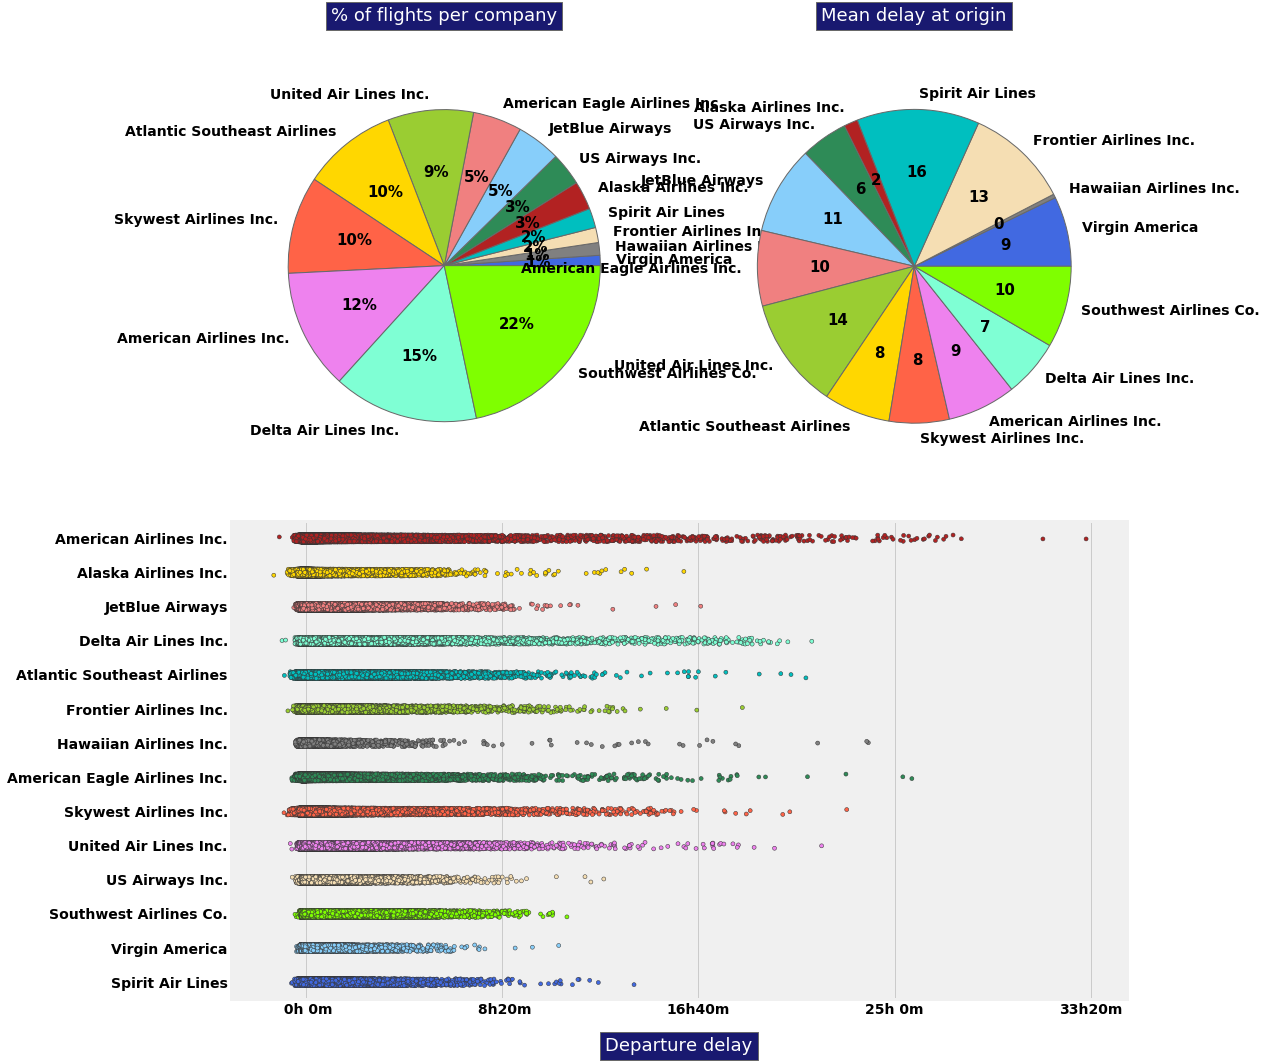

In [14]:

font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df2 = All_flights.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
df2['AIRLINE'] = df2['AIRLINE'].replace(companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________

#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 

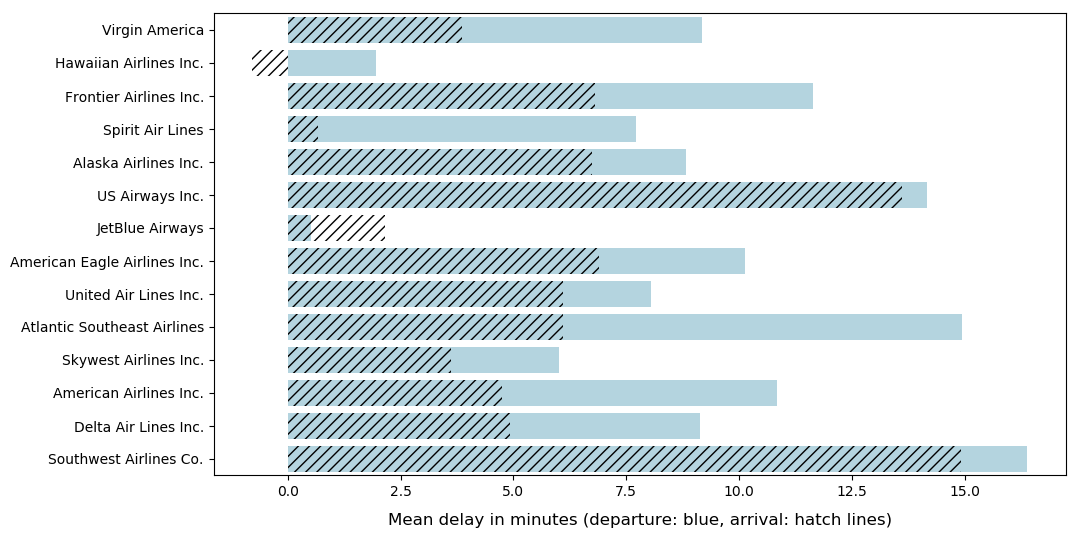

In [153]:
################Delays: take-off or landing ?####################

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=All_flights, color="lightblue", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=All_flights, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay in minutes (departure: blue, arrival: hatch lines)',
           fontsize=12, labelpad=10);

In [51]:
All_flights['departure_delay'] = np.where(All_flights.DEPARTURE_DELAY>0,1,0)
All_flights['arival_delay'] = np.where(All_flights.ARRIVAL_DELAY>0,1,0)
bx = All_flights.groupby('MONTH').DEPARTURE_DELAY.mean().round(2)

bx.index = bx.index.map(month)
trace1 = go.Bar(
    x=bx.index,
    y=bx.values,
    name = 'Departure delay',
    marker = dict(
        color = 'blue'
    )
)

bx = All_flights.groupby('MONTH').ARRIVAL_DELAY.mean().round(2)
bx.index = bx.index.map(month)

trace2 = go.Bar(
    x=bx.index,
    y=bx.values,
    name='Arrival_delay',
    marker=dict(
        color = 'red'
    )
)

data = [trace1,trace2]
layout = go.Layout(
    title='Delay Percentage Per Month (%)', 
    yaxis = dict(title = 'Precentage')
)

figure = go.Figure(data=data, layout=layout)
py.plot(figure)

## opens in seperate window. attached to work folder -delay precentage per month ####
##############################################################################################

'temp-plot.html'

In [52]:
bx = All_flights.MONTH.value_counts().to_frame().reset_index().sort_values(by='index')
bx.columns = ['month', 'flight_num']
month = {1: 'January', 2: 'Febuary', 3: 'March', 4: 'April', 5: 'May',
            6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
bx.month = bx.month.map(month)

trace = go.Bar(
    x=bx.month,
    y=bx.flight_num,
    marker=dict(
        color = bx.flight_num,
        colorscale='Jet',
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='Number of Flights Per Month', 
    yaxis = dict(title = 'Number of Flights'
                                                )
)

fig = go.Figure(data=data, layout=layout)
py.plot(fig)

####### opens in seperate window. attached to work folder -Number of flights per month #######
##############################################################################################


'temp-plot.html'

In [53]:
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 
                                           6:'Saturday', 7:'Sunday'}
bx = All_flights.DAY_OF_WEEK.value_counts()
bx = bx.to_frame().sort_index()
bx.index = bx.index.map(dayOfWeek)

trace1 = go.Bar(
    x=bx.index,
    y=bx.DAY_OF_WEEK,
    name = 'Weather',
    marker=dict(
        color = bx.DAY_OF_WEEK,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace1]
layout = go.Layout(
    title='Number of Flights Per Weekday', 
    yaxis = dict(title = 'Number of Flights'
                                                    )
)

figure = go.Figure(data=data, layout=layout)
py.plot(figure)

## opens in seperate window. attached to work folder - Number of flights per weekday####
##############################################################################################

'temp-plot.html'

C:\Users\michs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


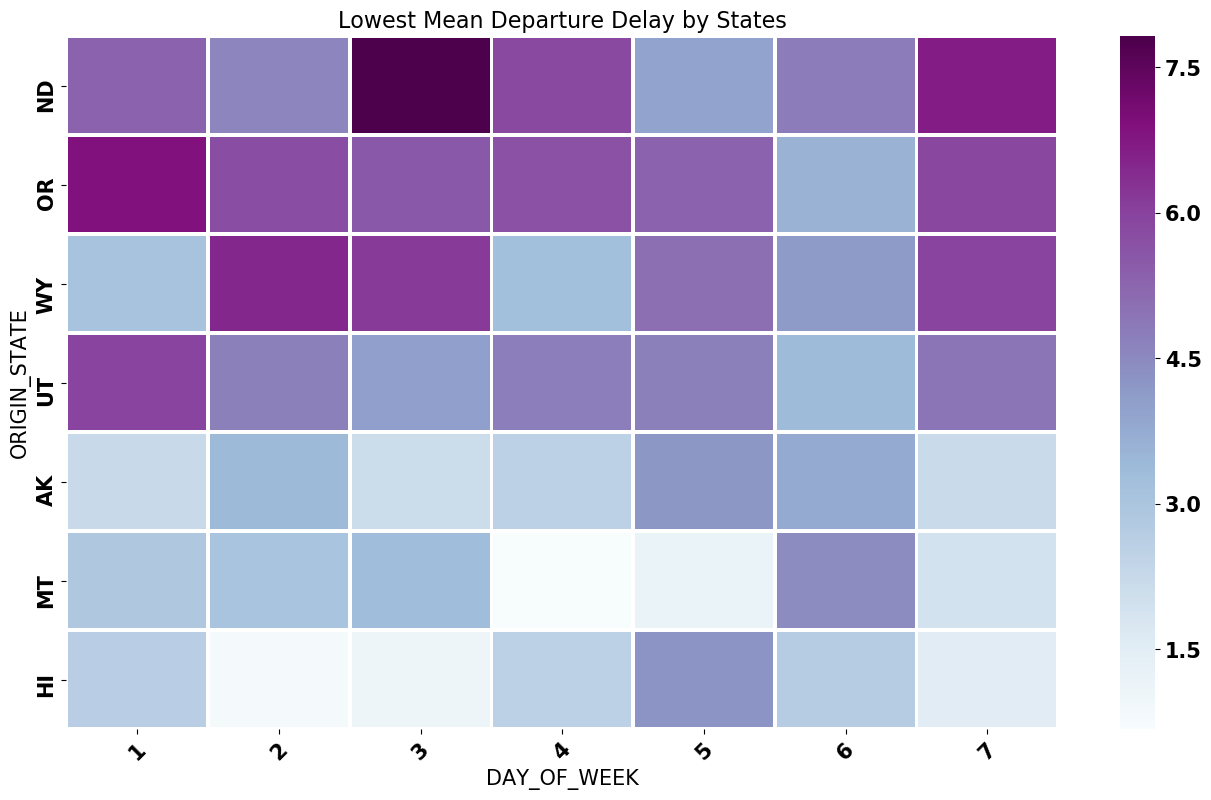

In [80]:
##### Corellaation between Origin State - Weekday on departure delay ############# 

arr = All_flights.pivot_table(index="ORIGIN_STATE",columns="DAY_OF_WEEK",values="DEPARTURE_DELAY",
                     aggfunc=lambda x:x.mean())
arr['sum'] = arr[1] + arr[2] +arr[3]+arr[4]+arr[5]+arr[6]+arr[7]

fv = arr.sort_values(by='sum')[:7]
fv = fv.iloc[::-1]
fv = fv.drop(['sum'], axis=1)
fig = plt.figure(figsize=(16,9))
sns.heatmap(fv, cmap='BuPu',linecolor="w", linewidths=2)

plt.title('Lowest Mean Departure Delay by States', size=16)
plt.ylabel('ORIGIN_STATE')
plt.xticks(rotation=45)
plt.show()

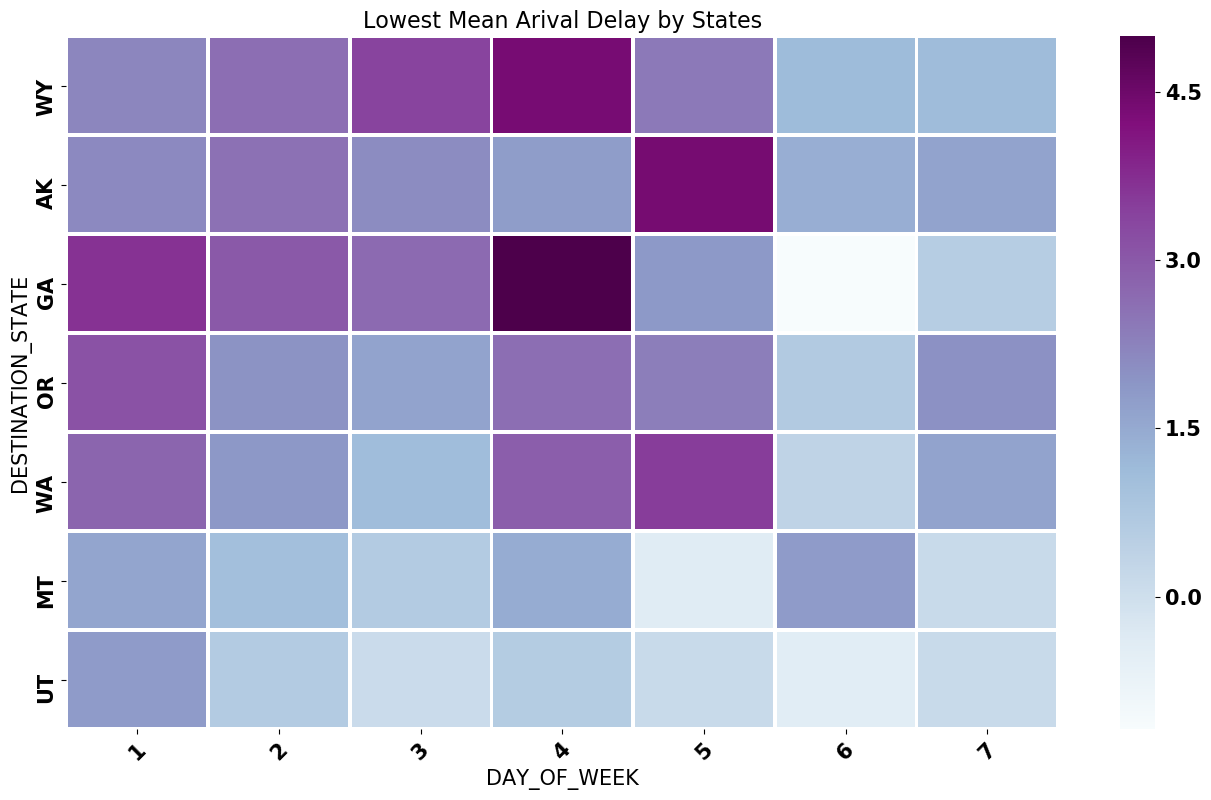

In [81]:
##### Corellaation between Destination State - Weekday on arival delay ############# 

arr = All_flights.pivot_table(index="DESTINATION_STATE",columns="DAY_OF_WEEK",values="ARRIVAL_DELAY",
                     aggfunc=lambda x:x.mean())
arr['sum'] = arr[1] + arr[2] +arr[3]+arr[4]+arr[5]+arr[6]+arr[7]

fv = arr.sort_values(by='sum')[:7]
fv = fv.iloc[::-1]
fv = fv.drop(['sum'], axis=1)
fig = plt.figure(figsize=(16,9))
sns.heatmap(fv, cmap='BuPu',linecolor="w", linewidths=2)

plt.title('Lowest Mean Arival Delay by States', size=16)
plt.ylabel('DESTINATION_STATE')
plt.xticks(rotation=45)
plt.show()

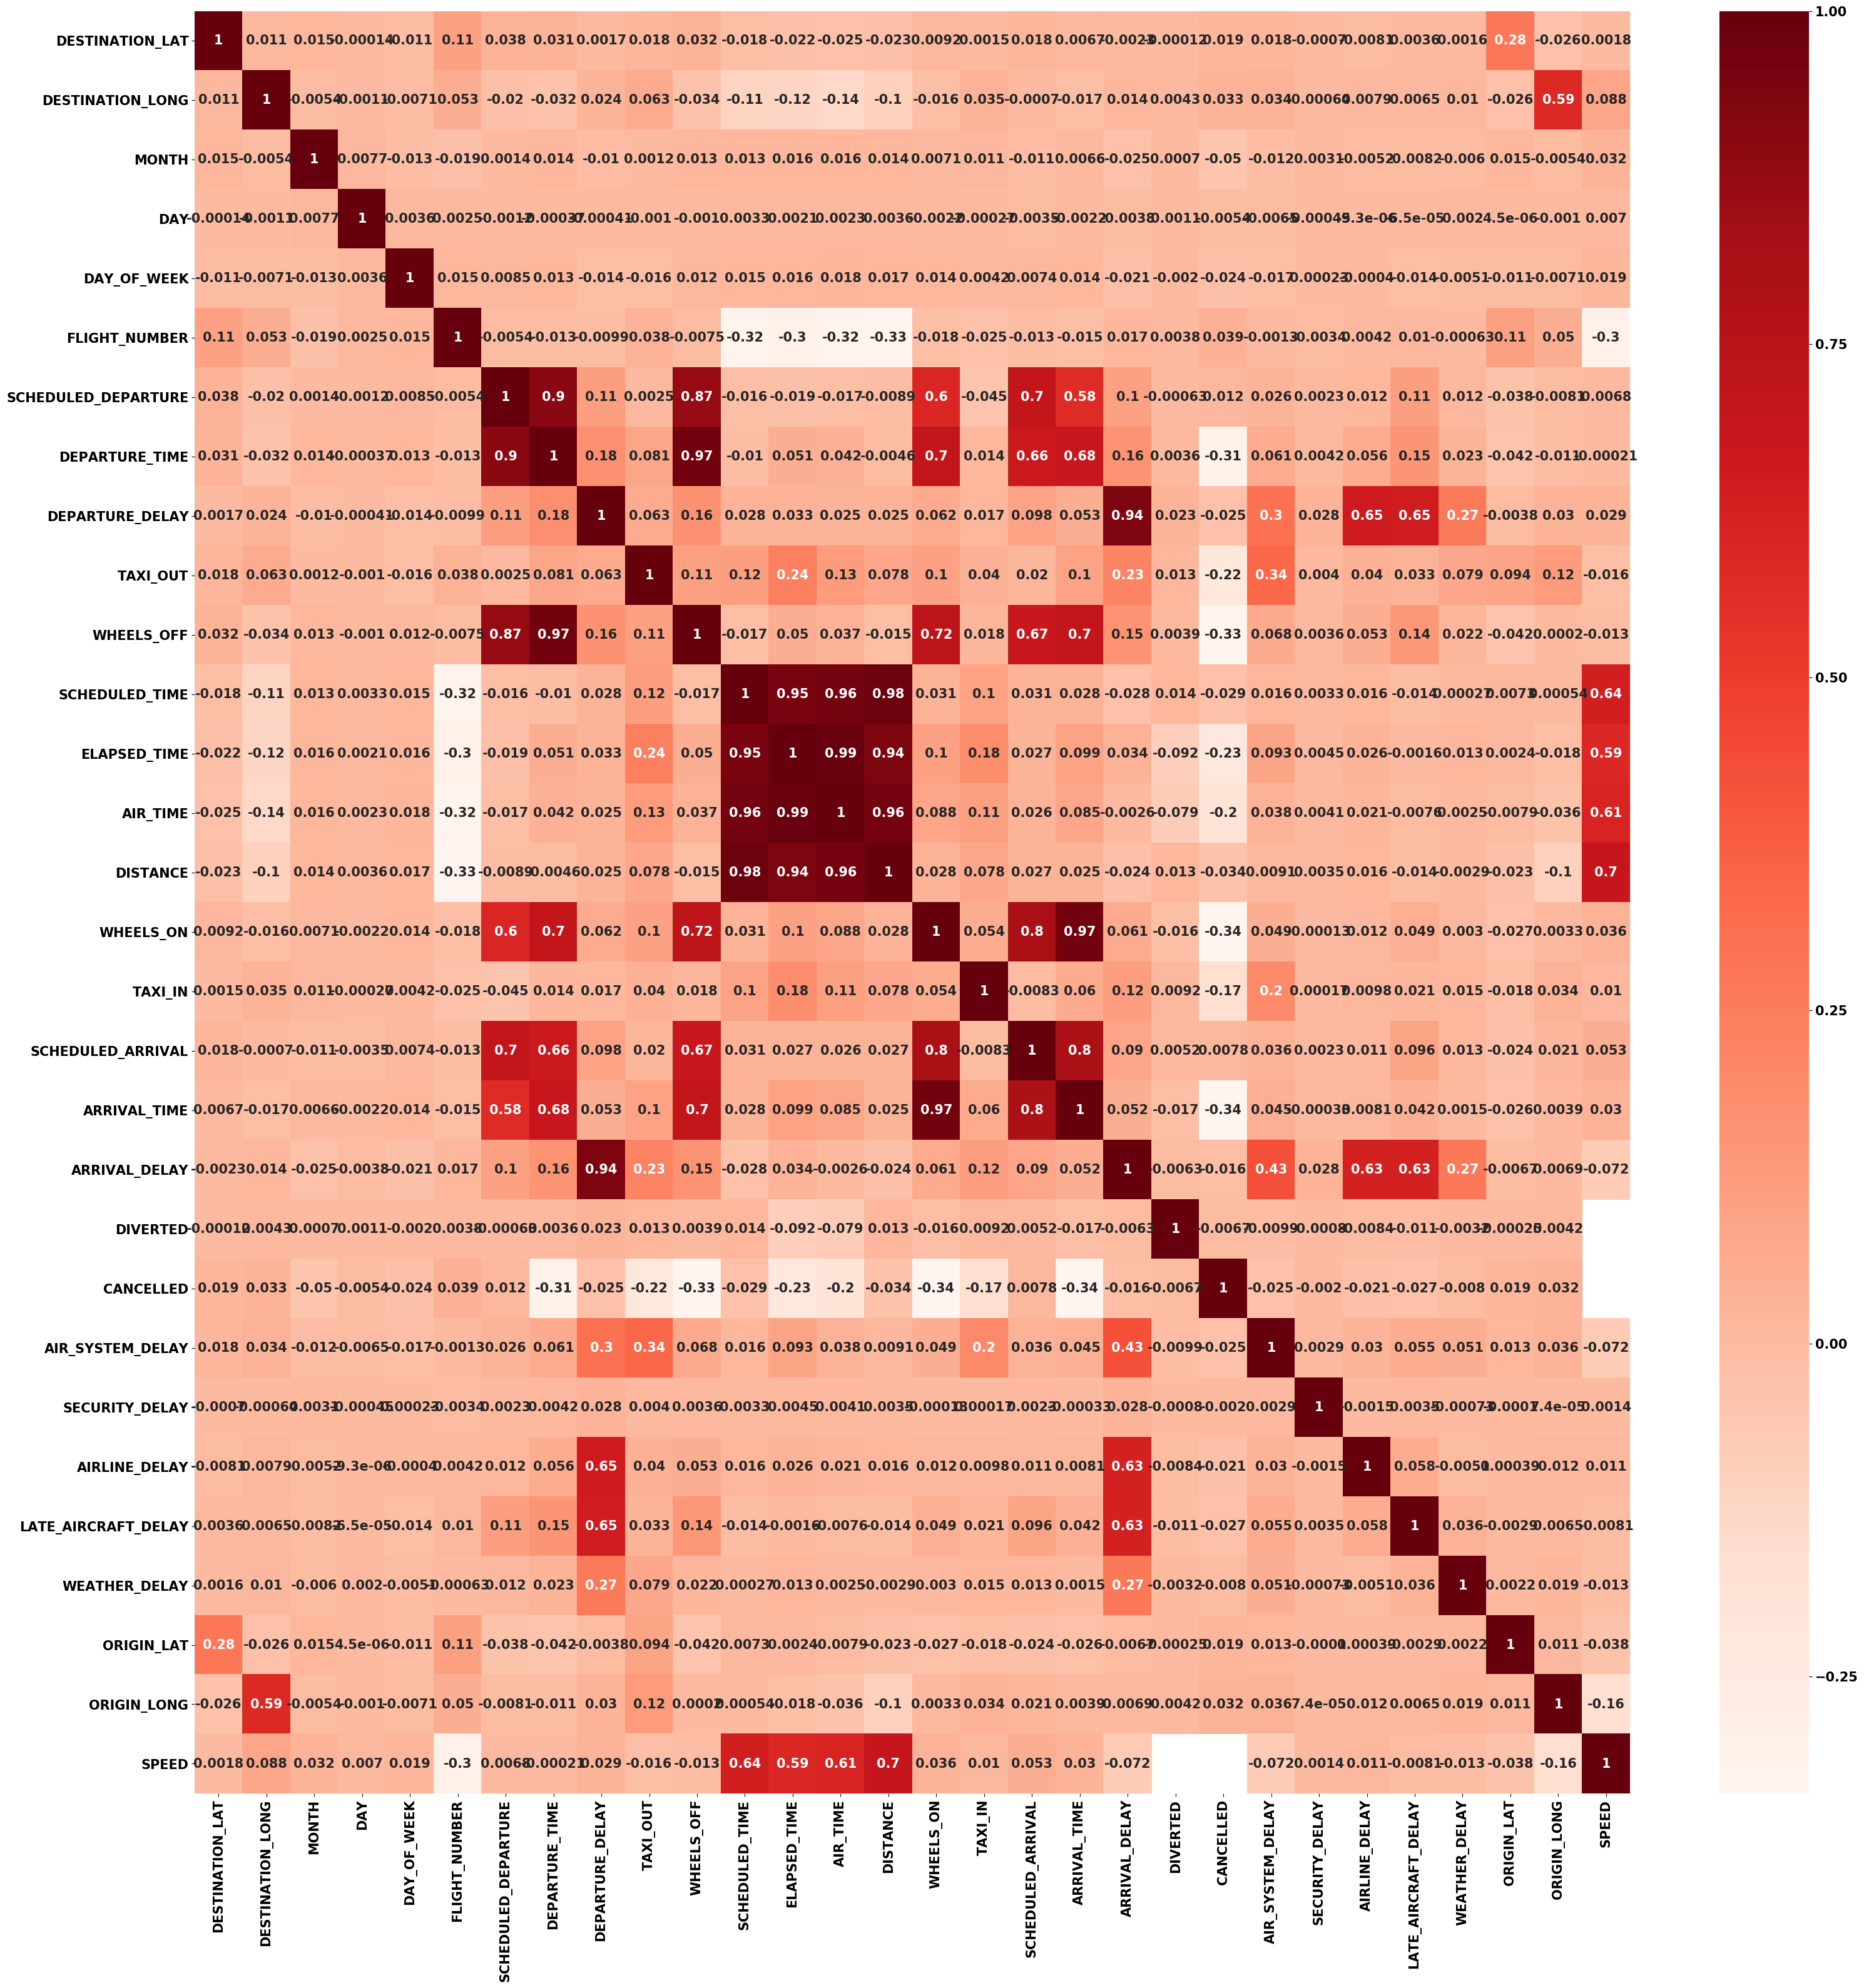

In [137]:
########## Correlation Matrix #############

corrMatrix = All_flights.corr()
plt.figure(figsize=(37,37))
sns.heatmap(corrMatrix, annot=True, cmap=plt.cm.Reds)
plt.show()

# Prediction

In [30]:
All_flights.shape

(5819079, 43)

In [26]:
# split data into train and test sets##
#prediction of arrival delays without calculation departure delay


Y_arr = All_flights[["ARRIVAL_DELAY"]]
X_arr = All_flights
X_arr = X_arr.drop('ARRIVAL_DELAY', 1)
X_arr = X_arr.drop('DEPARTURE_DELAY', 1)
X_arr = X_arr.drop('DESTINATION_AIRPORT_NAME', 1)
X_arr = X_arr.drop('DESTINATION_STATE', 1)
X_arr = X_arr.drop('TAIL_NUMBER', 1)
X_arr = X_arr.drop('ORIGIN_AIRPORT', 1)
X_arr = X_arr.drop('DESTINATION_AIRPORT', 1)
X_arr = X_arr.drop('CANCELLATION_REASON', 1)
X_arr = X_arr.drop('IATA_CODE', 1)
X_arr = X_arr.drop('AIRLINE', 1)
X_arr = X_arr.drop('ORIGIN_AIRPORT_NAME', 1)
X_arr = X_arr.drop('ORIGIN_CITY', 1)
X_arr = X_arr.drop('ORIGIN_STATE', 1)
X_arr = X_arr.drop('COUNTRY', 1)
X_arr = X_arr.drop('DESTINATION_CITY', 1)
X_arr = X_arr.drop('DATE', 1)

seed = 9
test_size = 0.15
x_train, x_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size=test_size, random_state=seed)

In [27]:
x_train.shape

(4946217, 30)

In [29]:
###############################################
# fit model no training data (XGB regressor)###
###############################################

model = XGBRegressor(n_estimators=150)
model.fit(x_train, y_train)

[09:22:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:03] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [30]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [33]:
y_pred.shape

(872862,)

In [ ]:
################### XGB regressor with departure delay #####################

In [34]:
# split data into train and test sets##
#prediction of arrival delays with calculation departure delay


Y_arr = All_flights[["ARRIVAL_DELAY"]]
X_arr = All_flights
X_arr = X_arr.drop('ARRIVAL_DELAY', 1)
#X_arr = X_arr.drop('DEPARTURE_DELAY', 1)
X_arr = X_arr.drop('DESTINATION_AIRPORT_NAME', 1)
X_arr = X_arr.drop('DESTINATION_STATE', 1)
X_arr = X_arr.drop('TAIL_NUMBER', 1)
X_arr = X_arr.drop('ORIGIN_AIRPORT', 1)
X_arr = X_arr.drop('DESTINATION_AIRPORT', 1)
X_arr = X_arr.drop('CANCELLATION_REASON', 1)
X_arr = X_arr.drop('IATA_CODE', 1)
X_arr = X_arr.drop('AIRLINE', 1)
X_arr = X_arr.drop('ORIGIN_AIRPORT_NAME', 1)
X_arr = X_arr.drop('ORIGIN_CITY', 1)
X_arr = X_arr.drop('ORIGIN_STATE', 1)
X_arr = X_arr.drop('COUNTRY', 1)
X_arr = X_arr.drop('DESTINATION_CITY', 1)
X_arr = X_arr.drop('DATE', 1)

seed = 9
test_size = 0.15
x_train, x_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size=test_size, random_state=seed)

In [35]:
###############################################
# fit model no training data (XGB regressor)###
###############################################

model = XGBRegressor(n_estimators=150)
model.fit(x_train, y_train)

[13:59:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:44] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [36]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]